In [1]:
#importing drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

data_dir = '/content/drive/MyDrive/SAC10550/First Set'

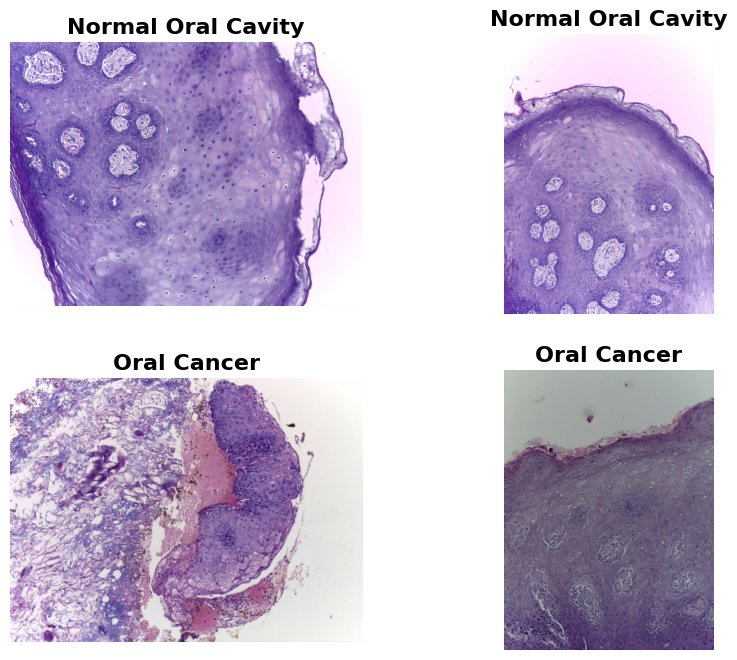

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


normal_dir = os.path.join(data_dir, '100x Normal Oral Cavity Histopathological Images')
oral_cancer_dir = os.path.join(data_dir, '100x OSCC Histopathological Images')

# Get the list of files in each directory
normal_files = os.listdir(normal_dir)[:2]  # Select the first two normal images
oral_cancer_files = os.listdir(oral_cancer_dir)[:2]  # Select the first two oralcancer images

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot normal images
for i in range(2):
    img_path = os.path.join(normal_dir, normal_files[i])
    img = mpimg.imread(img_path)
    axes[0, i].imshow(img)
    axes[0, i].axis('off')
    axes[0, i].set_title('Normal Oral Cavity',fontsize=16,fontweight='bold')

# Plot oral cancer images
for i in range(2):
    img_path = os.path.join(oral_cancer_dir, oral_cancer_files[i])
    img = mpimg.imread(img_path)
    axes[1, i].imshow(img)
    axes[1, i].axis('off')
    axes[1, i].set_title('Oral Cancer',fontsize=16,fontweight='bold')

plt.show()


Preprocessing

In [ ]:
import cv2
import numpy as np
from skimage import img_as_ubyte
from scipy.ndimage import median_filter
from scipy.signal import convolve2d

def weiner_filter(img, kernel_size=(5, 5)):
    psf = np.ones(kernel_size) / np.prod(kernel_size)
    img_fft = np.fft.fft2(img)
    psf_fft = np.fft.fft2(psf, s=img.shape)
    result_fft = np.conj(psf_fft) / (np.abs(psf_fft) ** 2 + 0.1)
    result_fft *= img_fft
    result = np.abs(np.fft.ifft2(result_fft))
    return result.astype(np.uint8)

def adaptive_median_filter(img, window_size=3, max_window_size=11):
    img = img.astype(np.float32) / 255.0  # Normalize to [0, 1]
    img_median = median_filter(img, size=window_size)
    img_diff = np.abs(img - img_median)

    while window_size < max_window_size:
        img_median = median_filter(img, size=window_size)
        img_diff = np.abs(img - img_median)
        mask = img_diff <= 30  # Adjust this threshold based on your images
        if np.all(mask):
            break
        window_size += 2

    return (img_median * 255).astype(np.uint8)

def fuzzy_weighted_filter(img, window_size=3):
    img = img.astype(np.float32) / 255.0  # Normalize to [0, 1]
    kernel = np.ones((window_size, window_size), np.float32) / (window_size ** 2)
    blurred = cv2.filter2D(img, -1, kernel)
    diff = img - blurred
    result = blurred + (diff ** 2) / (diff ** 2 + 10) * diff
    return (result * 255).astype(np.uint8)

def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Apply Weiner Filtering
    weiner_filtered = weiner_filter(img)

    # Apply Adaptive Adjusting Filtering Window with Median Filter
    adaptive_median_filtered = adaptive_median_filter(weiner_filtered)

    # Apply Fuzzy Weighted Filter
    fuzzy_weighted_filtered = fuzzy_weighted_filter(adaptive_median_filtered)

    return fuzzy_weighted_filtered


In [ ]:
def preprocess_images_in_directory(directory):
    preprocessed_images = []
    for filename in os.listdir(directory):
        if filename.endswith(".png") or filename.endswith(".jpg"):
            img_path = os.path.join(directory, filename)
            preprocessed_img = preprocess_image(img_path)
            preprocessed_images.append(preprocessed_img)
    return preprocessed_images

# Preprocess normal images
normal_images_dir = os.path.join(data_dir, '100x Normal Oral Cavity Histopathological Images')
preprocessed_normal_images = preprocess_images_in_directory(normal_images_dir)

# Preprocess oral cancer images
oral_cancer_images_dir = os.path.join(data_dir, '100x OSCC Histopathological Images')
preprocessed_oral_cancer_images = preprocess_images_in_directory(oral_cancer_images_dir)

In [ ]:
import os
import cv2

# Define file paths for saving
normal_preprocessed = '/content/drive/My Drive/SAC10550/Preprocessed/Normal Oral Cavity'
oral_cancer_preprocessed = '/content/drive/My Drive/SAC10550/Preprocessed/Oral Cancer'

def save_preprocessed_images(preprocessed_images, save_path):
    os.makedirs(save_path, exist_ok=True)
    for i, img in enumerate(preprocessed_images):
        filename = f"preprocessed_{i + 1}.png"  # You can adjust the filename as needed
        save_filepath = os.path.join(save_path, filename)
        cv2.imwrite(save_filepath, img)

# Save preprocessed normal images
save_preprocessed_images(preprocessed_normal_images, normal_preprocessed)

# Save preprocessed oral cancer images
save_preprocessed_images(preprocessed_oral_cancer_images, oral_cancer_preprocessed)


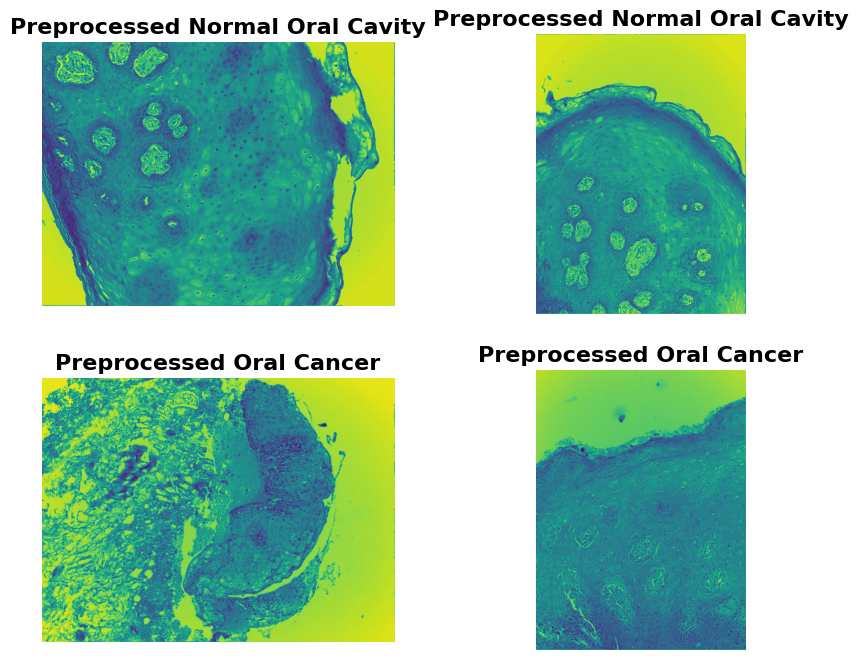

In [4]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

data_dir='/content/drive/My Drive/SAC10550/Preprocessed'
normal_preprocessed_dir = os.path.join(data_dir, 'Normal Oral Cavity')
oral_cancer_preprocessed_dir = os.path.join(data_dir, 'Oral Cancer')

# Get the list of files in each directory
normal_files = os.listdir(normal_preprocessed_dir)[:2]  # Select the first two normal images
oral_cancer_files = os.listdir(oral_cancer_preprocessed_dir)[:2]  # Select the first two oralcancer images

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot normal images
for i in range(2):
    img_path = os.path.join(normal_preprocessed_dir, normal_files[i])
    img = mpimg.imread(img_path)
    axes[0, i].imshow(img)
    axes[0, i].axis('off')
    axes[0, i].set_title('Preprocessed Normal Oral Cavity',fontsize=16,fontweight='bold')

# Plot oral cancer images
for i in range(2):
    img_path = os.path.join(oral_cancer_preprocessed_dir, oral_cancer_files[i])
    img = mpimg.imread(img_path)
    axes[1, i].imshow(img)
    axes[1, i].axis('off')
    axes[1, i].set_title('Preprocessed Oral Cancer',fontsize=16,fontweight='bold')

plt.show()


Feature Extraction

In [59]:
import os
import cv2
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
import pywt

# Set the paths for your dataset
data_dir = '/content/drive/My Drive/SAC10550/Preprocessed'
normal_preprocessed_dir = os.path.join(data_dir, 'Normal Oral Cavity')
oral_cancer_preprocessed_dir = os.path.join(data_dir, 'Oral Cancer')

# Function to extract BoW features from text data
def extract_bow_features(text_data):
    vectorizer = CountVectorizer()
    bow_features = vectorizer.fit_transform(text_data)
    return bow_features.toarray()

# Function to extract EfficientNet features from image data
def extract_effnet_features(image_paths):
    effnet_model = EfficientNetB0(weights='imagenet', include_top=False)
    image_features = []
    for path in image_paths:
        img = image.load_img(path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = preprocess_input(img_array)
        features = effnet_model.predict(np.expand_dims(img_array, axis=0))
        image_features.append(features.flatten())
    return np.array(image_features)

# Function to extract DWT features from image data
def extract_dwt_features(image_paths):
    dwt_features = []
    for path in image_paths:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        coeffs = pywt.dwt2(img, 'haar')

        # Reshape each component instead of using ravel()
        cA_flat = coeffs[0].reshape(-1)
        cH_flat = coeffs[1][0].reshape(-1)
        cV_flat = coeffs[1][1].reshape(-1)

        features = np.concatenate((cA_flat, cH_flat, cV_flat))
        dwt_features.append(features)
    return np.array(dwt_features)


# Function to extract EHD features from image data
def extract_ehd_features(image_paths):
    ehd_features = []
    for path in image_paths:
        img = cv2.imread(path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray, 100, 200)
        hist = cv2.calcHist([edges], [0], None, [256], [0, 256])
        ehd_features.append(hist.flatten())
    return np.array(ehd_features)

# Get the list of image paths for each class
normal_image_paths = [os.path.join(normal_preprocessed_dir, img) for img in os.listdir(normal_preprocessed_dir)][:10]
oral_cancer_image_paths = [os.path.join(oral_cancer_preprocessed_dir, img) for img in os.listdir(oral_cancer_preprocessed_dir)][:10]
# Placeholder for your actual text data (replace with your text data or labels)
labels = ['normal'] * len(normal_image_paths) + ['cancer'] * len(oral_cancer_image_paths)
text_data = labels

# Extract features for Normal Oral Cavity images
bow_normal_features = extract_bow_features(text_data[:len(normal_image_paths)])
effnet_normal_features = extract_effnet_features(normal_image_paths)
dwt_normal_features = extract_dwt_features(normal_image_paths)
ehd_normal_features = extract_ehd_features(normal_image_paths)

# Extract features for Oral Cancer images
bow_cancer_features = extract_bow_features(text_data[len(normal_image_paths):])
effnet_cancer_features = extract_effnet_features(oral_cancer_image_paths)
dwt_cancer_features = extract_dwt_features(oral_cancer_image_paths)
ehd_cancer_features = extract_ehd_features(oral_cancer_image_paths)

# Combine features for each class
combined_normal_features = np.concatenate((bow_normal_features, effnet_normal_features, dwt_normal_features, ehd_normal_features), axis=1)
combined_cancer_features = np.concatenate((bow_cancer_features, effnet_cancer_features, dwt_cancer_features, ehd_cancer_features), axis=1)

# Combine features for the entire dataset
all_features = np.concatenate((combined_normal_features, combined_cancer_features), axis=0)



1/1 [==============================] - 0s 95ms/step


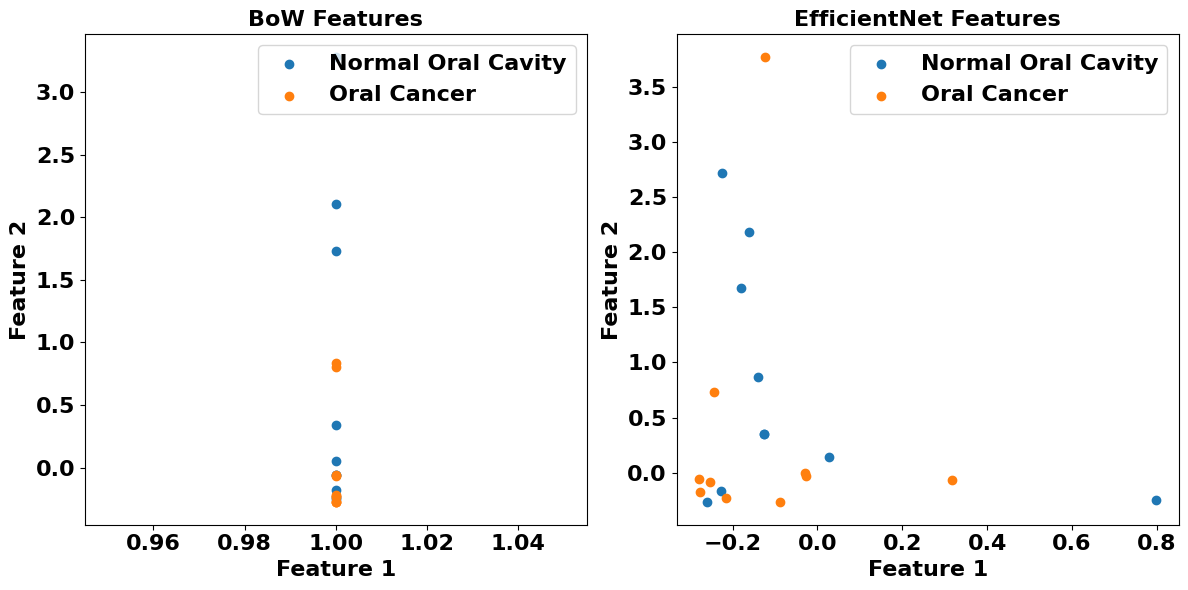

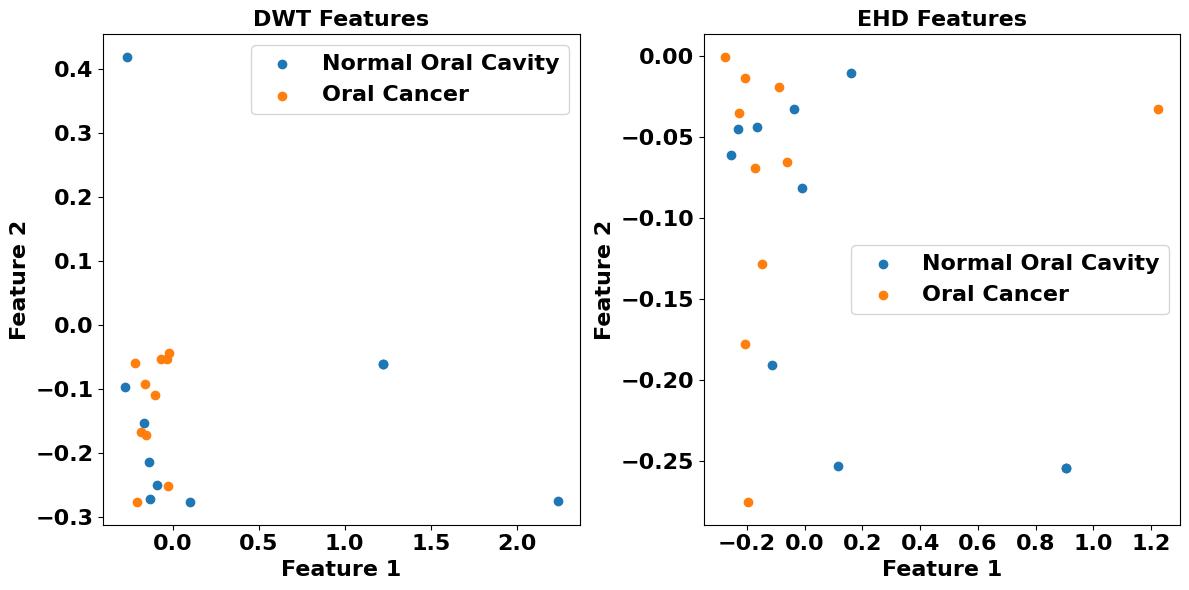

In [3]:
import matplotlib.pyplot as plt

# Visualize BoW features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(combined_normal_features[:, 0], combined_normal_features[:, 1], label='Normal Oral Cavity')
plt.scatter(combined_cancer_features[:, 0], combined_cancer_features[:, 1], label='Oral Cancer')
plt.title('BoW Features',fontsize=16,fontweight='bold')
plt.xlabel('Feature 1',fontsize=16,fontweight='bold')
plt.ylabel('Feature 2',fontsize=16,fontweight='bold')
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
plt.legend(prop={'size':16,'weight':'bold'})

# Visualize EfficientNet features
plt.subplot(1, 2, 2)
plt.scatter(combined_normal_features[:, 2], combined_normal_features[:, 3], label='Normal Oral Cavity')
plt.scatter(combined_cancer_features[:, 2], combined_cancer_features[:, 3], label='Oral Cancer')
plt.title('EfficientNet Features',fontsize=16,fontweight='bold')
plt.xlabel('Feature 1',fontsize=16,fontweight='bold')
plt.ylabel('Feature 2',fontsize=16,fontweight='bold')
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
plt.legend(prop={'size':16,'weight':'bold'})

plt.tight_layout()
plt.show()

# Visualize DWT features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(combined_normal_features[:, 4], combined_normal_features[:, 5], label='Normal Oral Cavity')
plt.scatter(combined_cancer_features[:, 4], combined_cancer_features[:, 5], label='Oral Cancer')
plt.title('DWT Features',fontsize=16,fontweight='bold')
plt.xlabel('Feature 1',fontsize=16,fontweight='bold')
plt.ylabel('Feature 2',fontsize=16,fontweight='bold')
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
plt.legend(prop={'size':16,'weight':'bold'})

# Visualize EHD features
plt.subplot(1, 2, 2)
plt.scatter(combined_normal_features[:, 6], combined_normal_features[:, 7], label='Normal Oral Cavity')
plt.scatter(combined_cancer_features[:, 6], combined_cancer_features[:, 7], label='Oral Cancer')
plt.title('EHD Features',fontsize=16,fontweight='bold')
plt.xlabel('Feature 1',fontsize=16,fontweight='bold')
plt.ylabel('Feature 2',fontsize=16,fontweight='bold')
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
plt.legend(prop={'size':16,'weight':'bold'})

plt.tight_layout()
plt.show()


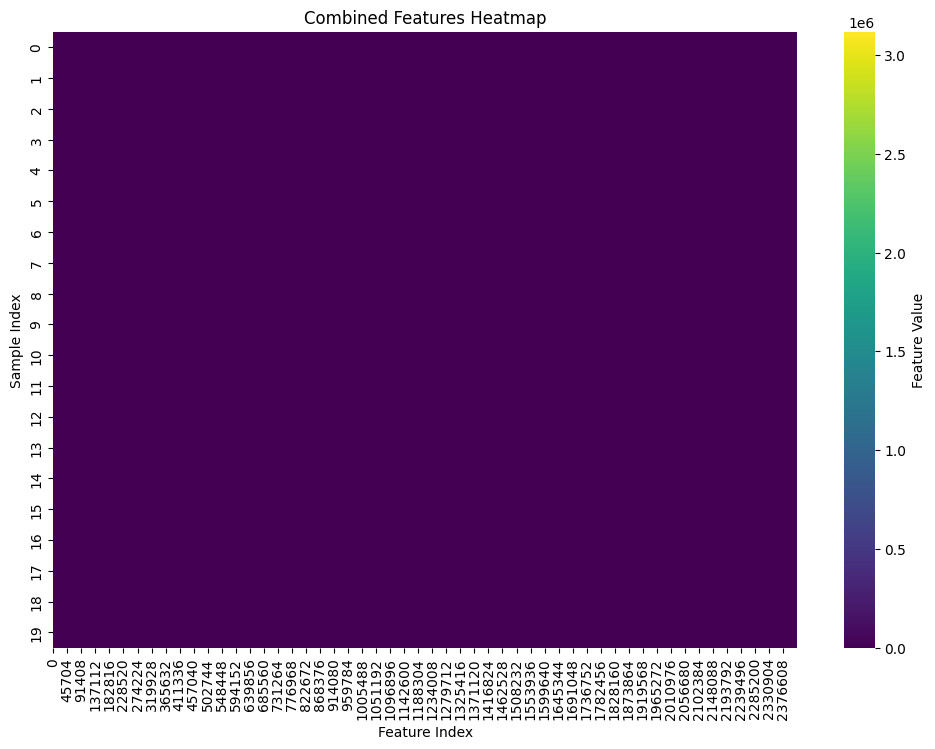

In [4]:
import seaborn as sns

# Combine labels for visualization
combined_labels = np.array(['normal'] * len(combined_normal_features) + ['cancer'] * len(combined_cancer_features))

# Combine all features
all_combined_features = np.concatenate((combined_normal_features, combined_cancer_features), axis=0)

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(all_combined_features, cmap='viridis', cbar_kws={'label': 'Feature Value'})
plt.xlabel('Feature Index')
plt.ylabel('Sample Index')
plt.title('Combined Features Heatmap')
plt.show()


In [9]:
text_data

['normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'cancer',
 'cancer',
 'cancer',
 'cancer',
 'cancer',
 'cancer',
 'cancer',
 'cancer',
 'cancer',
 'cancer']

In [11]:
#@title Feature Selection

In [3]:
import numpy as np
import pandas as pd

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [60]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
labels=le.fit_transform(labels)

In [5]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

normal means 1 cancer means 0

In [24]:
!pip install lifelines


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 6.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=1b8bd4e2f381c63dc93f830da5774f6aec29e082009c171ba7d9d32e2a7917e7
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [61]:
import os
import cv2
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
import pywt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

# Fireworks algorithm class definition
class Fireworks:
    def __init__(self, threshold=0.5, n_clusters=3):
        self.threshold = threshold
        self.n_clusters = n_clusters
        self.selected_features_ = None

    def _initialize_fireworks(self, X):
        num_features = X.shape[1]
        fireworks_positions = np.random.rand(self.n_clusters, num_features)
        return fireworks_positions

    def _explode_fireworks(self, fireworks_positions, X):
        distances = np.linalg.norm(fireworks_positions[:, np.newaxis, :] - X, axis=2)
        return distances

    def _select_features(self, distances, threshold):
        selected_features = np.max(distances, axis=0) > threshold
        return selected_features

    def fit(self, X, y):
        fireworks_positions = self._initialize_fireworks(X)
        distances = self._explode_fireworks(fireworks_positions, X)

        # Iterate for a certain number of iterations or until convergence
        for _ in range(5):  # Reducing the number of iterations
            selected_features = self._select_features(distances, self.threshold)

            # Update fireworks positions based on selected features
            fireworks_positions = np.mean(X[:, selected_features], axis=0)

            # Calculate distances again
            distances = self._explode_fireworks(np.array([fireworks_positions]), X)

        # Update selected_features to match the original feature indices
        original_indices = np.arange(X.shape[1])
        self.selected_features_ = original_indices[selected_features]


# Assuming all_features and labels are defined before this point
X_train, X_test, y_train, y_test = train_test_split(all_features, labels, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)


StandardScaler()

In [62]:

sel_lasso = SelectFromModel(Lasso(alpha=0.001, random_state=42))
sel_lasso.fit(scaler.transform(X_train), y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.608e-03, tolerance: 3.733e-04
  model = cd_fast.enet_coordinate_descent(


SelectFromModel(estimator=Lasso(alpha=0.001, random_state=42))

In [63]:
X_train_selected = sel_lasso.transform(scaler.transform(X_train))
X_test_selected = sel_lasso.transform(scaler.transform(X_test))



In [64]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

def fireworks_algorithm(X_train, X_test, y_train, y_test, alpha=0.001, num_fireworks=20, num_sparks=5, max_iter=50):
    # Standardize the data
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Feature selection using Lasso
    sel_lasso = SelectFromModel(Lasso(alpha=alpha, random_state=42))
    sel_lasso.fit(X_train_scaled, y_train)

    # Selected features
    X_train_selected = sel_lasso.transform(X_train_scaled)
    X_test_selected = sel_lasso.transform(X_test_scaled)

    # Initialize fireworks positions and velocities
    fireworks_positions = np.random.rand(num_fireworks, X_train_selected.shape[1])
    fireworks_velocities = np.random.rand(num_fireworks, X_train_selected.shape[1])

    # Main loop
    for iteration in range(max_iter):
        # Evaluate fitness for each firework
        fitness = np.zeros(num_fireworks)
        for i in range(num_fireworks):
            model = Lasso(alpha=alpha, random_state=42)
            model.fit(X_train_selected * fireworks_positions[i], y_train)
            y_pred = model.predict(X_test_selected * fireworks_positions[i])
            fitness[i] = mean_squared_error(y_test, y_pred)

        # Sort fireworks based on fitness
        sorted_indices = np.argsort(fitness)
        fireworks_positions = fireworks_positions[sorted_indices]
        fireworks_velocities = fireworks_velocities[sorted_indices]

        # Update positions and velocities
        for i in range(1, num_fireworks):
            fireworks_velocities[i] = 0.5 * fireworks_velocities[i] + 0.5 * (fireworks_positions[i - 1] - fireworks_positions[i])
            fireworks_positions[i] = fireworks_positions[i] + fireworks_velocities[i]

        # Exploration and exploitation
        for i in range(num_fireworks - num_sparks, num_fireworks):
            fireworks_positions[i] = np.random.rand(X_train_selected.shape[1])

    # Return the best solution
    best_solution = fireworks_positions[0]
    return best_solution

# Example usage
X_train, X_test, y_train, y_test = train_test_split(all_features, labels, random_state=42)
best_features = fireworks_algorithm(X_train, X_test, y_train, y_test, alpha=0.001)
print("Selected features:", best_features)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.608e-03, tolerance: 3.733e-04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.728e-04, tolerance: 3.733e-04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.733e-04, tolerance: 3.733e

Selected features: [ 1.02727822  0.38976887  0.16712579  0.22232044  0.13832013 -0.16802608
  0.23407312  0.4868729   0.22978292 -0.22750368  0.04399794  0.37903203
  0.70260886  0.74862839  0.12138245 -0.1021707  -0.09721785  0.40787222
 -0.27406658  0.83874262  0.24416899  0.21920993  0.02418819  0.22574861
  0.47335057  0.32823807  0.23952056  0.11768895  0.47804604  0.99367821
  0.7458672  -0.0146557   0.17647698  0.40311127 -0.35182662  0.14451118
 -0.20253181  0.78283637 -0.05005745  0.68506408  0.02124194 -0.09565945
  0.4493776   0.20838551 -0.27342407 -0.22478492  0.69508057]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.853e-04, tolerance: 3.733e-04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.146e-03, tolerance: 3.733e-04
  model = cd_fast.enet_coordinate_descent(


In [65]:
best_features.shape

(47,)

In [14]:
#@title Transfer Learning Model

In [40]:
X_train

array([[ 1.00000000e+00,  2.10518503e+00, -2.26884544e-01, ...,
         0.00000000e+00,  0.00000000e+00,  2.31946000e+05],
       [ 1.00000000e+00, -2.78105706e-01, -1.23033822e-01, ...,
         0.00000000e+00,  0.00000000e+00,  5.81250000e+04],
       [ 1.00000000e+00, -2.46751323e-01, -2.25002497e-01, ...,
         0.00000000e+00,  0.00000000e+00,  7.68070000e+04],
       ...,
       [ 1.00000000e+00, -2.37965405e-01, -2.15278924e-01, ...,
         0.00000000e+00,  0.00000000e+00,  2.23286000e+05],
       [ 1.00000000e+00,  8.37096334e-01, -2.80235503e-02, ...,
         0.00000000e+00,  0.00000000e+00,  2.75430000e+04],
       [ 1.00000000e+00,  5.68722486e-02, -1.79217443e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.49788000e+05]])

In [41]:
X_train.shape

(15, 2422273)

In [43]:
X_test.shape

(5, 2422273)

In [47]:
y_train.shape

(15,)

In [48]:
y_test.shape

(5,)

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_nasanet(input_shape):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    model.add(layers.Dense(128, activation='relu'))  # Add more layers as needed
    model.add(layers.Dense(1, activation='sigmoid'))  # Assuming binary classification, change this if needed

    return model

def create_shufflenet(input_shape):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    model.add(layers.Dense(128, activation='relu'))  # Add more layers as needed
    model.add(layers.Dense(1, activation='sigmoid'))  # Assuming binary classification, change this if needed

    return model

# Example usage with your input shapes
nasanet_model = create_nasanet((37,))
shufflenet_model = create_shufflenet((37,))

# Compile the models with an appropriate optimizer, loss function, and metrics
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = 'binary_crossentropy'  # Adjust for your task
metrics = ['accuracy']

nasanet_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
shufflenet_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Print model summaries
print("NasNet Model Summary:")
nasanet_model.summary()

print("\nShuffleNet Model Summary:")
shufflenet_model.summary()


NasNet Model Summary:
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               4864      
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4993 (19.50 KB)
Trainable params: 4993 (19.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

ShuffleNet Model Summary:
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               4864      
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
               

In [66]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models



# Assuming labels for the features
labels = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
                   0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
                   0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(best_features, labels, test_size=0.2, random_state=42)

# Reshape the data for compatibility with the models
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)



In [67]:
X_train.shape

(37, 1)

In [68]:
y_train.shape

(37,)

In [69]:
# Create NasNet model
nasanet_model = create_nasanet((1,))
nasanet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train NasNet model
nasanet_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/100
2/2 [==============================] - 1s 286ms/step - loss: 0.6954 - accuracy: 0.4865 - val_loss: 0.6976 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 69ms/step - loss: 0.6946 - accuracy: 0.4865 - val_loss: 0.6979 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 46ms/step - loss: 0.6944 - accuracy: 0.5405 - val_loss: 0.6985 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 65ms/step - loss: 0.6941 - accuracy: 0.5676 - val_loss: 0.6988 - val_accuracy: 0.4000
Epoch 5/100
2/2 [==============================] - 0s 66ms/step - loss: 0.6939 - accuracy: 0.6216 - val_loss: 0.6992 - val_accuracy: 0.4000
Epoch 6/100
2/2 [==============================] - 0s 44ms/step - loss: 0.6938 - accuracy: 0.5676 - val_loss: 0.6997 - val_accuracy: 0.4000
Epoch 7/100
2/2 [==============================] - 0s 59ms/step - loss: 0.6938 - accuracy: 0.5405 - val_loss: 0.7003 - val_accuracy: 0.4000
Epoch 8/100
2/2 [==

In [24]:
# Create ShuffleNet model
shufflenet_model = create_shufflenet((1,))
shufflenet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train ShuffleNet model
shufflenet_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
2/2 [==============================] - 1s 317ms/step - loss: 0.6949 - accuracy: 0.4865 - val_loss: 0.6963 - val_accuracy: 0.4000
Epoch 2/100
2/2 [==============================] - 0s 69ms/step - loss: 0.6950 - accuracy: 0.5135 - val_loss: 0.6974 - val_accuracy: 0.4000
Epoch 3/100
2/2 [==============================] - 0s 91ms/step - loss: 0.6925 - accuracy: 0.5135 - val_loss: 0.6965 - val_accuracy: 0.4000
Epoch 4/100
2/2 [==============================] - 0s 70ms/step - loss: 0.6928 - accuracy: 0.5135 - val_loss: 0.6957 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 71ms/step - loss: 0.6935 - accuracy: 0.4324 - val_loss: 0.6952 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 73ms/step - loss: 0.6936 - accuracy: 0.4865 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 70ms/step - loss: 0.6941 - accuracy: 0.4595 - val_loss: 0.6949 - val_accuracy: 0.5000
Epoch 8/100
2/2 [==

In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_combined_model(input_shape):
    # Create NasNet model
    nasanet_model = create_nasanet(input_shape)

    # Create ShuffleNet model
    shufflenet_model = create_shufflenet(input_shape)

    # Define input layer
    input_layer = layers.Input(shape=input_shape)

    # Get outputs from each model
    nasanet_output = nasanet_model(input_layer)
    shufflenet_output = shufflenet_model(input_layer)

    # Concatenate the outputs along the last axis
    combined_output = layers.Concatenate(axis=-1)([nasanet_output, shufflenet_output])

    # Add more layers if needed
    combined_output = layers.Dense(64, activation='relu')(combined_output)
    combined_output = layers.Dense(1, activation='sigmoid')(combined_output)  # Assuming binary classification

    # Create the combined model
    combined_model = models.Model(inputs=input_layer, outputs=combined_output)

    return combined_model

# Example usage with your input shape
combined_model = create_combined_model((37,))

# Compile the combined model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = 'binary_crossentropy'  # Adjust for your task
metrics = ['accuracy']

combined_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Print the combined model summary
combined_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_17 (InputLayer)       [(None, 37)]                 0         []                            
                                                                                                  
 sequential_14 (Sequential)  (None, 1)                    4993      ['input_17[0][0]']            
                                                                                                  
 sequential_15 (Sequential)  (None, 1)                    4993      ['input_17[0][0]']            
                                                                                                  
 concatenate (Concatenate)   (None, 2)                    0         ['sequential_14[0][0]',       
                                                                     'sequential_15[0][0]']   

In [70]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

# Assuming labels for the features
labels = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
                   0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
                   0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(best_features, labels, test_size=0.2, random_state=42)

# Reshape the data for compatibility with the models
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Architecture
def create_combined_model(input_shape):
    nasanet_model = create_nasanet(input_shape)
    shufflenet_model = create_shufflenet(input_shape)

    input_layer = layers.Input(shape=input_shape)

    nasanet_output = nasanet_model(input_layer)
    shufflenet_output = shufflenet_model(input_layer)

    combined_output = layers.Concatenate(axis=-1)([nasanet_output, shufflenet_output])

    combined_output = layers.Dense(128, activation='relu')(combined_output)
    combined_output = layers.Dropout(0.5)(combined_output)  # Add dropout for regularization
    combined_output = layers.Dense(1, activation='sigmoid')(combined_output)

    combined_model = models.Model(inputs=input_layer, outputs=combined_output)

    return combined_model

# Compile the combined model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
loss = 'binary_crossentropy'
metrics = ['accuracy']

combined_model = create_combined_model((1,))
combined_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Print the combined model summary
combined_model.summary()

# Cross-Validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in kfold.split(X_train_scaled, y_train):
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Train the model on the current fold
    history = combined_model.fit(
        X_train_fold, y_train_fold,
        epochs=100,
        batch_size=64,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping]
    )

# Evaluate on the test set
test_loss, test_acc = combined_model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')


Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_53 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 sequential_32 (Sequential)  (None, 1)                    385       ['input_53[0][0]']            
                                                                                                  
 sequential_33 (Sequential)  (None, 1)                    385       ['input_53[0][0]']            
                                                                                                  
 concatenate_19 (Concatenat  (None, 2)                    0         ['sequential_32[0][0]',       
 e)                                                                  'sequential_33[0][0]']

In [71]:
#@title Unet Model

In [74]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Assuming labels for the features
labels = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
                   0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
                   0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])



# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(best_features, labels, test_size=0.2, random_state=42)


def create_unet(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    conv1 = layers.Conv1D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = layers.Conv1D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling1D(pool_size=2)(conv1)

    # Decoder
    conv2 = layers.Conv1D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = layers.Conv1D(128, 3, activation='relu', padding='same')(conv2)
    up1 = layers.UpSampling1D(size=2)(conv2)

    # Output layer
    outputs = layers.Conv1D(1, 1, activation='sigmoid')(up1)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Example usage
unet_model = create_unet((37, 1))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = 'binary_crossentropy'  # Adjust for your task
metrics = ['accuracy']

unet_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Print model summary
unet_model.summary()



Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_55 (InputLayer)       [(None, 37, 1)]           0         
                                                                 
 conv1d_72 (Conv1D)          (None, 37, 64)            256       
                                                                 
 conv1d_73 (Conv1D)          (None, 37, 64)            12352     
                                                                 
 max_pooling1d_21 (MaxPooli  (None, 18, 64)            0         
 ng1D)                                                           
                                                                 
 conv1d_74 (Conv1D)          (None, 18, 128)           24704     
                                                                 
 conv1d_75 (Conv1D)          (None, 18, 128)           49280     
                                                          

In [85]:
X_train.shape

(37,)

In [86]:
y_train.shape

(37,)

In [87]:
X_test.shape

(10,)

In [88]:
y_test.shape

(10,)

In [89]:
X_train

array([ 0.22978292,  0.22232044,  0.23407312,  0.02124194,  0.40311127,
        0.74862839,  0.40787222, -0.27342407, -0.1021707 , -0.22750368,
       -0.09721785,  0.99367821,  0.17647698, -0.22478492,  1.02727822,
       -0.0146557 ,  0.7458672 , -0.16802608,  0.37903203, -0.35182662,
        0.38976887, -0.09565945,  0.21920993,  0.16712579,  0.14451118,
        0.22574861,  0.78283637,  0.04399794,  0.02418819, -0.27406658,
        0.69508057,  0.24416899,  0.4868729 ,  0.4493776 ,  0.12138245,
        0.47804604, -0.05005745])

In [90]:
X_test

array([ 0.11768895,  0.68506408,  0.23952056,  0.20838551,  0.47335057,
       -0.20253181,  0.70260886,  0.83874262,  0.13832013,  0.32823807])

In [99]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [2]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.metrics import MeanIoU
from sklearn.model_selection import train_test_split

# Set the paths
data_dir = '/content/drive/My Drive/SAC10550/Preprocessed'
normal_preprocessed_dir = os.path.join(data_dir, 'Normal Oral Cavity')
oral_cancer_preprocessed_dir = os.path.join(data_dir, 'Oral Cancer')


batch_size = 32
image_size = (256, 256)
num_classes = 2  # Binary segmentation task

# Data augmentation and normalization
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='input',  # Set this to 'input' for U-Net
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='input',
    subset='validation'
)




Found 424 images belonging to 2 classes.
Found 104 images belonging to 2 classes.


In [100]:
from tensorflow.keras.layers import BatchNormalization, Activation

def unet_model(input_shape=(256, 256, 3), num_classes=2):
    inputs = Input(input_shape)

    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    # Bottom
    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    # Decoder
    up6 = Conv2D(512, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
        UpSampling2D(size=(2, 2))(drop5))
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)

    up7 = Conv2D(256, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
        UpSampling2D(size=(2, 2))(conv6))
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)

    up8 = Conv2D(128, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
        UpSampling2D(size=(2, 2))(conv7))
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)

    up9 = Conv2D(64, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
        UpSampling2D(size=(2, 2))(conv8))
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
    conv9 = Conv2D(num_classes, 3, activation='softmax', padding='same', kernel_initializer='he_normal')(conv9)

    model = Model(inputs=inputs, outputs=conv9)

    model.compile(optimizer=Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create the U-Net model
model = unet_model(input_shape=(256, 256, 3), num_classes=num_classes)

# Display the model summary
model.summary()


Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_65 (InputLayer)       [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_27 (Conv2D)          (None, 256, 256, 64)         1792      ['input_65[0][0]']            
                                                                                                  
 conv2d_28 (Conv2D)          (None, 256, 256, 64)         36928     ['conv2d_27[0][0]']           
                                                                                                  
 max_pooling2d_5 (MaxPoolin  (None, 128, 128, 64)         0         ['conv2d_28[0][0]']           
 g2D)                                                                                      

In [51]:
#@title Fine tuning